# 01-action-potentials

1. **Action Potential Propagation in Neurons: The Hodgkin-Huxley Model**

i. Motivation:
- Understanding how neurons generate and propagate electrical signals
- Foundation for neural communication and brain function
- Classic example of mathematical biology with Nobel Prize significance
- Applicable to neurological disorders and drug development

AI support: Generate engaging explanatory content, create analogies, and provide interactive tutorials about membrane dynamics.

ii. Conceptual/Mathematical Description:
- Four coupled differential equations describing voltage and ion channel dynamics
- Membrane as electrical circuit with capacitance and variable conductances
- Voltage-dependent sodium and potassium channels
- Leak current contribution

AI support: Break down complex equations, generate step-by-step derivations, create visual explanations of the mathematical relationships.

iii. Implementation:
```python
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

def hh_model(state, t, I_ext):
    V, m, h, n = state
    # Channel dynamics equations
    # Voltage update
    # Return dV/dt, dm/dt, dh/dt, dn/dt
```

AI support: Debug code, suggest optimizations, explain numerical integration methods.

iv. Simulation/Visualization:
- Plot membrane voltage over time
- Visualize channel dynamics
- Create interactive widgets for parameter exploration
- Animate propagating action potential

AI support: Generate efficient plotting code, suggest best visualization practices, create interactive dashboards.

v. Going Deeper:
- Add spatial propagation along axon
- Include temperature dependence
- Model synaptic transmission
- Study effects of channel blockers
- Incorporate realistic morphology

AI support: Suggest relevant research papers, generate code templates for extensions, help optimize complex simulations.

----

The project can be implemented with varying levels of complexity, making it suitable for different skill levels. Key Python libraries to use include:

- NumPy/SciPy for numerical computations
- Matplotlib/Plotly for visualization
- NetworkX for network analysis
- Pandas for data management
- SymPy for symbolic mathematics
- scikit-learn for machine learning components

AI can significantly enhance the learning experience by:
1. Generating explanatory content and tutorials
2. Helping with code implementation and debugging
3. Suggesting optimizations and best practices
4. Finding relevant literature and examples
5. Creating interactive visualization tools
6. Assisting with parameter optimization
7. Generating test cases and validation data
8. Helping with model extension and modification



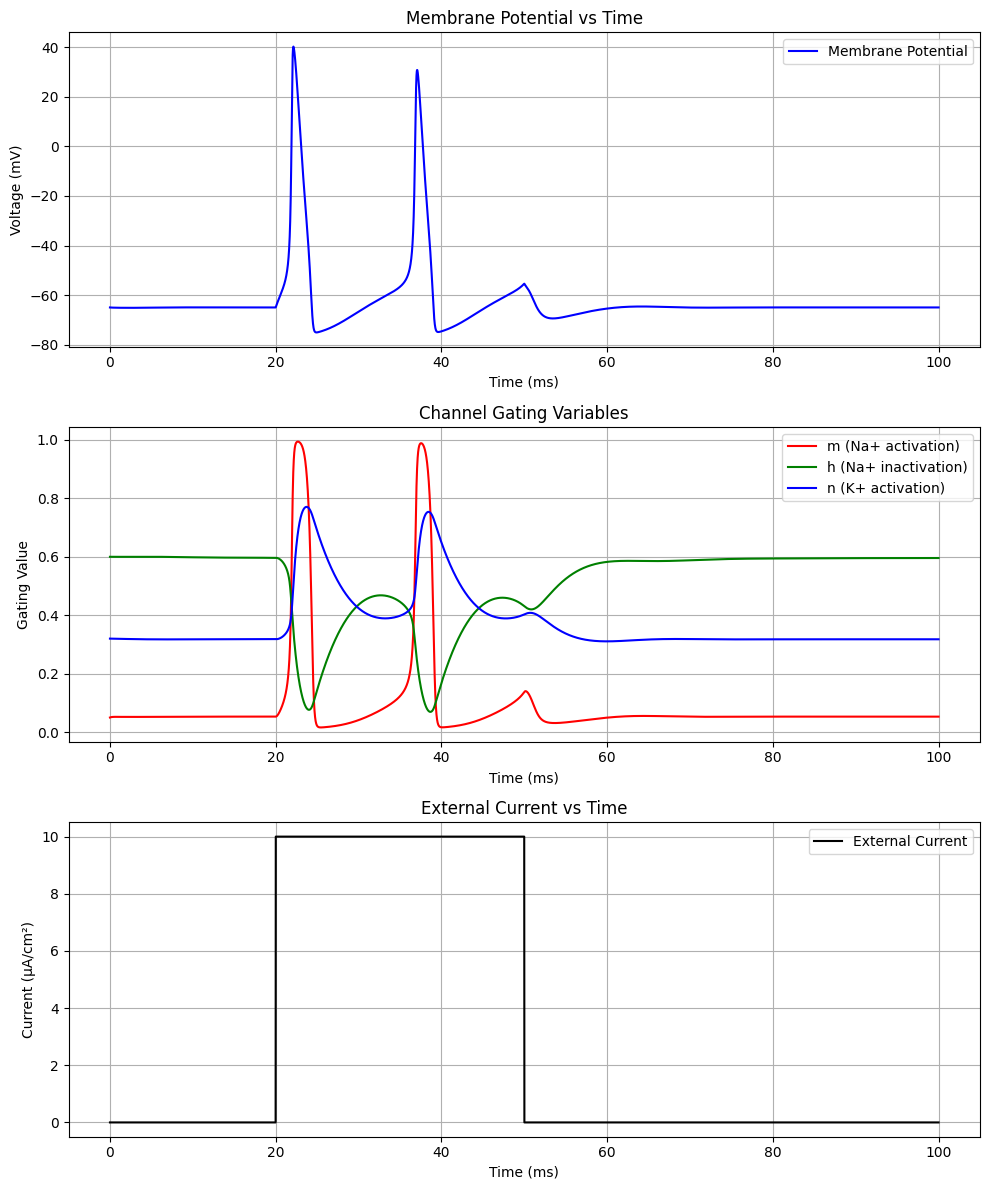

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

class HodgkinHuxleyNeuron:
    def __init__(self):
        # Membrane capacitance (µF/cm²)
        self.C_m = 1.0
        # Maximum conductances (mS/cm²)
        self.g_Na = 120.0
        self.g_K = 36.0
        self.g_L = 0.3
        # Reversal potentials (mV)
        self.E_Na = 50.0
        self.E_K = -77.0
        self.E_L = -54.387

    def alpha_m(self, V):
        return 0.1 * (V + 40.0) / (1.0 - np.exp(-(V + 40.0) / 10.0))

    def beta_m(self, V):
        return 4.0 * np.exp(-(V + 65.0) / 18.0)

    def alpha_h(self, V):
        return 0.07 * np.exp(-(V + 65.0) / 20.0)

    def beta_h(self, V):
        return 1.0 / (1.0 + np.exp(-(V + 35.0) / 10.0))

    def alpha_n(self, V):
        return 0.01 * (V + 55.0) / (1.0 - np.exp(-(V + 55.0) / 10.0))

    def beta_n(self, V):
        return 0.125 * np.exp(-(V + 65) / 80.0)

    def I_Na(self, V, m, h):
        return self.g_Na * m**3 * h * (V - self.E_Na)

    def I_K(self, V, n):
        return self.g_K * n**4 * (V - self.E_K)

    def I_L(self, V):
        return self.g_L * (V - self.E_L)

    def dALLdt(self, X, t, I_ext_function):
        """
        Calculate time derivatives for all state variables.
        X = [V, m, h, n]
        """
        V, m, h, n = X

        # Calculate membrane current
        I_Na = self.I_Na(V, m, h)
        I_K = self.I_K(V, n)
        I_L = self.I_L(V)
        
        # Get external current at this time point
        I_ext = I_ext_function(t)
        
        # dV/dt
        dVdt = (I_ext - I_Na - I_K - I_L) / self.C_m
        
        # Channel gating variables
        dmdt = self.alpha_m(V) * (1.0 - m) - self.beta_m(V) * m
        dhdt = self.alpha_h(V) * (1.0 - h) - self.beta_h(V) * h
        dndt = self.alpha_n(V) * (1.0 - n) - self.beta_n(V) * n
        
        return [dVdt, dmdt, dhdt, dndt]

    def simulate(self, t_span, I_ext_function):
        """
        Run simulation for given time span and external current function
        """
        # Initial conditions [V, m, h, n]
        X0 = [-65, 0.05, 0.6, 0.32]
        
        # Time points
        t = np.linspace(0, t_span, int(t_span/0.01))
        
        # Solve ODE system
        solution = odeint(self.dALLdt, X0, t, args=(I_ext_function,))
        
        return t, solution

def visualize_simulation(t, solution, I_ext):
    """
    Visualize simulation results
    """
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 12))
    
    # Plot membrane potential
    ax1.plot(t, solution[:, 0], 'b', label='Membrane Potential')
    ax1.set_ylabel('Voltage (mV)')
    ax1.set_xlabel('Time (ms)')
    ax1.set_title('Membrane Potential vs Time')
    ax1.grid(True)
    ax1.legend()
    
    # Plot gating variables
    ax2.plot(t, solution[:, 1], 'r', label='m (Na+ activation)')
    ax2.plot(t, solution[:, 2], 'g', label='h (Na+ inactivation)')
    ax2.plot(t, solution[:, 3], 'b', label='n (K+ activation)')
    ax2.set_ylabel('Gating Value')
    ax2.set_xlabel('Time (ms)')
    ax2.set_title('Channel Gating Variables')
    ax2.grid(True)
    ax2.legend()
    
    # Plot input current
    ax3.plot(t, I_ext, 'k', label='External Current')
    ax3.set_ylabel('Current (µA/cm²)')
    ax3.set_xlabel('Time (ms)')
    ax3.set_title('External Current vs Time')
    ax3.grid(True)
    ax3.legend()
    
    plt.tight_layout()
    plt.show()

# Example usage
if __name__ == "__main__":
    # Create neuron instance
    neuron = HodgkinHuxleyNeuron()
    
    # Define external current function (step function)
    def I_ext_function(t):
        return 10.0 * (t >= 20) * (t <= 50)  # 10 µA/cm² between 20-50 ms
    
    # Run simulation
    t, solution = neuron.simulate(100, I_ext_function)
    
    # Visualize results
    I_ext = I_ext_function(t)
    visualize_simulation(t, solution, I_ext)